MACHINE LEARNING PARA PROCESAMIENTO DE IMAGENES DE MELANOMA

INTEGRANTE: Bellone Guillermo

Analisis de datos:


DATOS EXTRA:
"/content/drive/MyDrive/FACULTAD/ML e imag en Python /Melanoma" (ruta de acceso a TODO)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os  #El módulo os nos permite acceder a funcionalidades dependientes del Sistema Operativo. 
import pandas as pd
#voy abriendo hasta llegar a la carpeta.
PATH='drive/MyDrive/FACULTAD/ML e imag en Python /Melanoma'
os.listdir(PATH)

['test.csv',
 'train.csv',
 'sample_submission.csv',
 'jpeg224',
 'train_split.csv',
 'subset_split.csv',
 'val_split.csv']

In [ ]:
import pandas as pd #import pandas
train=pd.read_csv(f'{PATH}/train.csv') #abro entrenamiento con sus datos
train.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


En este cuadro vemos los diferentes datos a tener en cuenta, desde el id de la imagen y del paciente, sexo, edad, lugar anatomico del melanoma, disgnostico final y las ultimas columnas nos indican si es benigno (0) o maligno (1)

In [ ]:
imgs=os.listdir(f'{PATH}/jpeg224/train')
print(imgs[:5])
test=pd.read_csv(f'{PATH}/test.csv') #abro test con sus datos
test.head()

['ISIC_9843005.jpg', 'ISIC_9868388.jpg', 'ISIC_9396628.jpg', 'ISIC_9921831.jpg', 'ISIC_9368994.jpg']


,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


El tipo de la primer imagen es  <class 'numpy.ndarray'>
El tipo de cada píxel es  uint8
La dimensión de la imagen es  (224, 224, 3)


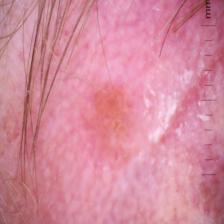

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
Imagen=cv2.imread(f'{PATH}/jpeg224/train/ISIC_2637011.jpg')
print("El tipo de la primer imagen es ",type(Imagen))
print("El tipo de cada píxel es ",Imagen.dtype)
print("La dimensión de la imagen es ",Imagen.shape)
cv2_imshow(Imagen) 


Vemos que los datos del test son parecidos solo no tienen los resultados finales.

In [ ]:
train.shape, test.shape

((33126, 8), (10982, 5))

33126 imagenes de entrenamiento y 10982 imagenes de test (no serán utilizadas las de test si no que para validar usaremos las mismas de entrenamiento)

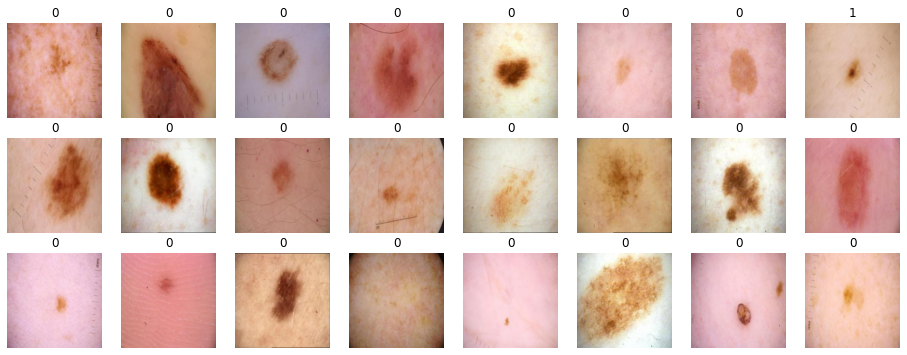

In [ ]:
import matplotlib.pyplot as plt   #para mostrar imagenes
from skimage import io            #para extraer imagenes de una carpeta
import random                     #para buscar una imagen random

r, c = 3, 8                         #armo un subplot de 4x4
fig=plt.figure(figsize=(2*c,2*r))
for _r in range(r):
  for _c in range(c):
    plt.subplot(r, c, _r*c+ _c +1)
    ix=random.randint(0, len(imgs)-1)   #selecciona un numero random entre 0 y 10981
    name=train['image_name'].values[ix] #Busca el nombre de una imagen
    img= io.imread(f'{PATH}/jpeg224/train/{name}.jpg')  #la lee
    plt.imshow(img), plt.axis(False)    #borramos axes
    label=train['target'].values[ix]    #colocamos 1 si son melanomas 0 si son benignos en las imagenes
    plt.title(label)
plt.show()

Si Corremos el codigo varias veces se puede ver la variedad y diferencias entre todas las imagenes que hay dentro de todos los datos. se nota a simple vista que hay muchas imagenes benignas (0) a comparacion de los tumores malignos (1)

0    32542
1      584
Name: target, dtype: int64

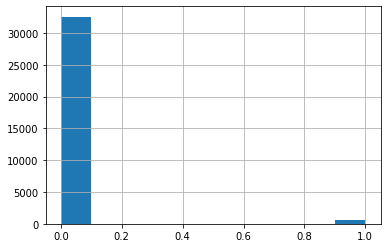

In [ ]:
train['target'].hist()    #realizamos histograma
train['target'].value_counts() #mas detallado.

Se ve claramente que hay mas de 30000 imagenes de clase 0 y muy pocas imagenes  (584) de clase 1 para este tipo de casos habra que hacerles transformaciones lineales a aquellas imagenes que contengan un 1 para aumentar las imagenes de tumores.

En total hay 33126 imagenes y solo el %1,76 representan imagenes de tumores.
Un modelo que nos de como resultado solo resultados 0 tendria un 98% de exito.

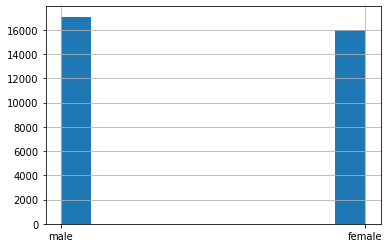

In [ ]:
#analisis de los demas datos:
train['sex'].hist()

Vemos que hay un equilibro entre pacientes hombres y mujeres.


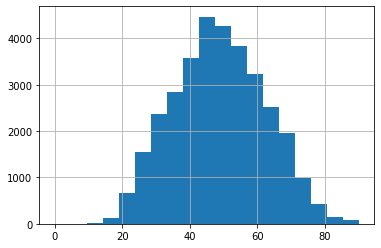

In [ ]:
train['age_approx'].hist(bins=len(train['age_approx'].unique())) #se le agrego un bins para organizar mejor la grafica


Vemos que hay una distribucion normal en las edades.

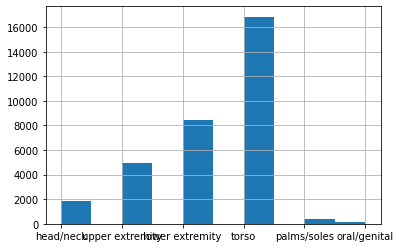

In [ ]:
train['anatom_site_general_challenge'].hist()

Predominan las imagenes del torso y en las palmas, plantas de pie, y la zona oral y genital escasean, para mejorar estos datos habria que ampliar los datos de las zonas que escasean


In [ ]:
from sklearn.model_selection import train_test_split #agarra un dataset y lo divide

train_split, val_split = train_test_split(train, test_size=0.33, shuffle=True, random_state=42, stratify=train['target']) 
#agarro solo 1/3 de los resultados, en lo posbile no consecutivos, y utilizo un random state para que siempre me den los mismos
#stratify hace que tengamos misma distribucion que teniamos antes de 0 y 1
train_split.shape, val_split.shape
train_split.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
20225,ISIC_6147712,IP_8210115,male,55.0,torso,unknown,benign,0
27960,ISIC_8460669,IP_1246698,female,40.0,lower extremity,unknown,benign,0
10600,ISIC_3272999,IP_3512888,female,35.0,torso,nevus,benign,0
7020,ISIC_2195125,IP_4576977,male,45.0,torso,unknown,benign,0
28270,ISIC_8557006,IP_2950485,female,40.0,lower extremity,unknown,benign,0


Usaremos 22194 imagenes para entrenar y 10932 para validar.

In [ ]:
_, subset = train_test_split(train_split, test_size=0.1, shuffle=True, random_state=42, stratify=train_split['target']) 
subset.shape

(2220, 8)

In [ ]:
#guardo estos datos nuevos para usarlos mas adelante:
train_split.to_csv(f'{PATH}/train_split.csv', index=False)
val_split.to_csv(f'{PATH}/val_split.csv', index=False)
subset.to_csv(f'{PATH}/subset_split.csv', index=False)
os.listdir(PATH)

['test.csv',
 'train.csv',
 'sample_submission.csv',
 'jpeg224',
 'train_split.csv',
 'subset_split.csv',
 'val_split.csv']

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
#entrenamos el de 2000 img
train = pd.read_csv(f'{PATH}/subset_split.csv')
val = pd.read_csv(f'{PATH}/val_split.csv')
train.shape, val.shape

((2220, 8), (10932, 8))

In [ ]:
def decode(name, label):
    img=tf.io.read_file(name)                 #agarra la imagen
    img=tf.image.decode_jpeg(img, channels=3) #la hace jpg
    img=tf.cast(img, tf.float32)              #tipo de dato
    return img, label

def load_ds(df):
  imgs,labels=df["image_name"].values, df["target"].values
  imgs=[f'{PATH}/jpeg224/train/{name}.jpg' for name in imgs]
  ds=tf.data.Dataset.from_tensor_slices((imgs, labels)) #array de numpy
  ds=ds.map(decode)
  ds=ds.shuffle(2048)                                   #mezcla las imagenes
  ds=ds.batch(64)                                       #agrupamos
  return ds




In [ ]:
train_ds = load_ds(train)
val_ds = load_ds(val)


Primera red neuronal

In [ ]:
from tensorflow.keras.applications import ResNet50V2 #importo el modelo de aplicacion
from tensorflow.keras import layers
IMAGE_SIZE= (224,224,3)
encoder= ResNet50V2(    #identifica colores y formas
    include_top=False,   #la ultima capa no la quiero
    input_shape=IMAGE_SIZE,  #shape
    weights='imagenet' #dataset que se usa para entrenar
)
encoder.trainable=False                 #no aplica gradientes al encoder anterior
inputs=keras.Input(shape=IMAGE_SIZE)
x=keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs) #divide imputs en 255
x=encoder(x, training=False)            #Utiliza ResNet50v2
x=keras.layers.GlobalAveragePooling2D()(x) #nos deja con la cantidad correcta de canales
outputs = keras.layers.Dense(units = 1, activation='sigmoid')(x)           #nos conecta todo a una sola neurona, Sigmoid= ajusta 0 o 1

model=keras.Model(inputs, outputs)
model.summary()

94668760/94668760 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 23,566,849
Trainable params: 2,049
Non-trainable

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss="binary_crossentropy",
    metrics=['accuracy']
)

In [ ]:
Historia=model.fit(train_ds, epochs=4, validation_data=val_ds, validation_steps=10)

Epoch 1/4
35/35 [==============================] - 565s 16s/step - loss: 0.0683 - accuracy: 0.9829 - val_loss: 0.1028 - val_accuracy: 0.9766
Epoch 2/4
35/35 [==============================] - 560s 16s/step - loss: 0.0636 - accuracy: 0.9838 - val_loss: 0.0722 - val_accuracy: 0.9859
Epoch 3/4
35/35 [==============================] - 541s 15s/step - loss: 0.0591 - accuracy: 0.9838 - val_loss: 0.0961 - val_accuracy: 0.9781
Epoch 4/4
35/35 [==============================] - 557s 16s/step - loss: 0.0568 - accuracy: 0.9838 - val_loss: 0.1275 - val_accuracy: 0.9734


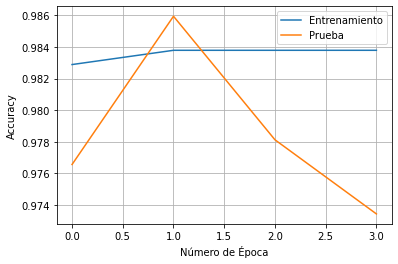

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Historia.history['accuracy'], label = 'Entrenamiento')
plt.plot(Historia.history['val_accuracy'], label = 'Prueba')
plt.grid()
plt.xlabel('Número de Época')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
val_r=val['target']
val_r.dtype
print(val_r)

0        0
1        0
2        0
3        0
4        0
        ..
10927    0
10928    0
10929    0
10930    0
10931    0
Name: target, Length: 10932, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
def mostrar_resultados(val_r, pred_y):
    LABELS= ("normal", "fraud")
    conf_matrix = confusion_matrix(val_r, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(val_r, pred_y))

171/171 [==============================] - 2413s 13s/step


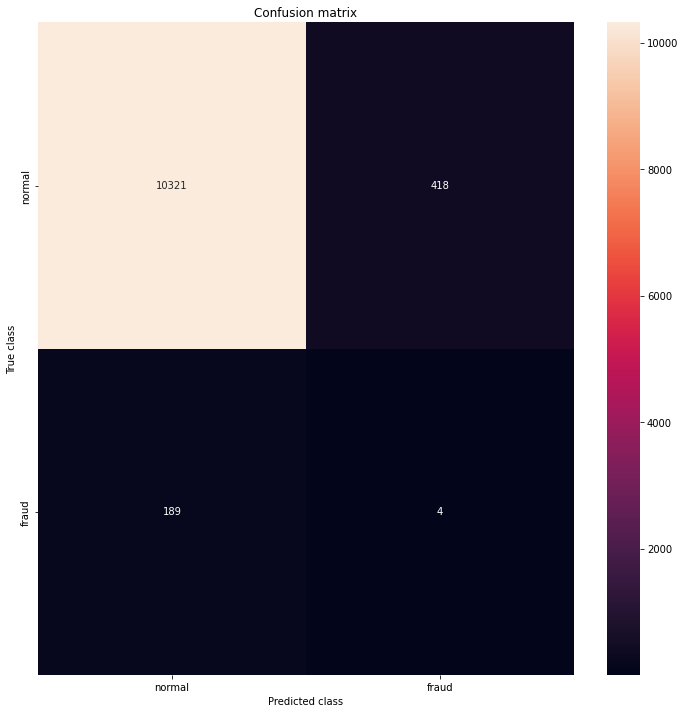

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     10739
           1       0.01      0.02      0.01       193

    accuracy                           0.94     10932
   macro avg       0.50      0.49      0.49     10932
weighted avg       0.96      0.94      0.95     10932



In [ ]:
import numpy as np
pred_y = model.predict(val_ds)
pred_y=(np.rint(pred_y)).astype(int)
mostrar_resultados(val_r, pred_y)

UTILIZAMOS UN BALANCEO DE IMAGENES PARA VER SI MEJORA LOS RESULTADOS. Con logisticregression.

Vemos que los resultados son similares al anterior

In [ ]:
import os  
import tensorflow as tf
from tensorflow import keras
import pandas as pd 

In [ ]:
PATH='drive/MyDrive/FACULTAD/ML e imag en Python /Melanoma'
os.listdir(PATH)
train = pd.read_csv(f'{PATH}/subset_split.csv')
val = pd.read_csv(f'{PATH}/val_split.csv')
train_ds = load_ds(train)
val_ds = load_ds(val)

In [ ]:
from tensorflow.keras.applications import ResNet50V2 #importo el modelo de aplicacion
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
IMAGE_SIZE= (224,224,3)
encoder= ResNet50V2(    #identifica colores y formas
    include_top=False,   #la ultima capa no la quiero
    input_shape=IMAGE_SIZE,  #shape
    weights='imagenet' #dataset que se usa para entrenar
)
encoder.trainable=False                 #no aplica gradientes al encoder anterior
inputs=keras.Input(shape=IMAGE_SIZE)
x = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced") #Equilibra a la clase minoritaria durante el entrenamiento
x=keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs) #divide imputs en 255
x=encoder(x, training=False)            #Utiliza ResNet50v2
x=keras.layers.GlobalAveragePooling2D()(x) #nos deja con la cantidad correcta de canales
outputs=keras.layers.Dense(1, activation="sigmoid")(x)               #nos conecta todo a una sola neurona, Sigmoid= ajusta 0 o 1

model=keras.Model(inputs, outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23,566,849
Trainable params: 2,049
Non-trainable params: 23,564,800
___________________________________________

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.AUC(name="auc")],
)

In [ ]:

Historia=model.fit(train_ds, epochs=10, validation_data=val_ds, validation_steps=10)


Epoch 1/10
35/35 [==============================] - 1605s 32s/step - loss: 0.2340 - auc: 0.4066 - val_loss: 0.1574 - val_auc: 0.3943
Epoch 2/10
35/35 [==============================] - 417s 12s/step - loss: 0.1131 - auc: 0.3899 - val_loss: 0.1675 - val_auc: 0.3585
Epoch 3/10
35/35 [==============================] - 426s 12s/step - loss: 0.0933 - auc: 0.5563 - val_loss: 0.1225 - val_auc: 0.7069
Epoch 4/10
35/35 [==============================] - 431s 12s/step - loss: 0.0836 - auc: 0.7070 - val_loss: 0.1364 - val_auc: 0.6789
Epoch 5/10
35/35 [==============================] - 417s 12s/step - loss: 0.0772 - auc: 0.7854 - val_loss: 0.1336 - val_auc: 0.7104
Epoch 6/10
35/35 [==============================] - 470s 13s/step - loss: 0.0719 - auc: 0.8500 - val_loss: 0.0989 - val_auc: 0.8381
Epoch 7/10
35/35 [==============================] - 418s 12s/step - loss: 0.0683 - auc: 0.8678 - val_loss: 0.0993 - val_auc: 0.8033
Epoch 8/10
35/35 [==============================] - 413s 12s/step - loss: 0

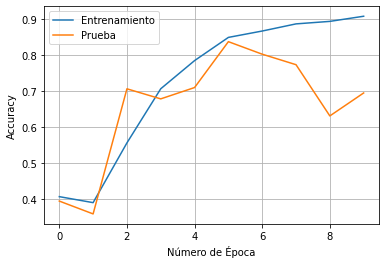

In [ ]:
plt.plot(Historia.history['auc'], label = 'Entrenamiento')
plt.plot(Historia.history['val_auc'], label = 'Prueba')
plt.grid()
plt.xlabel('Número de Época')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

171/171 [==============================] - 1269s 7s/step


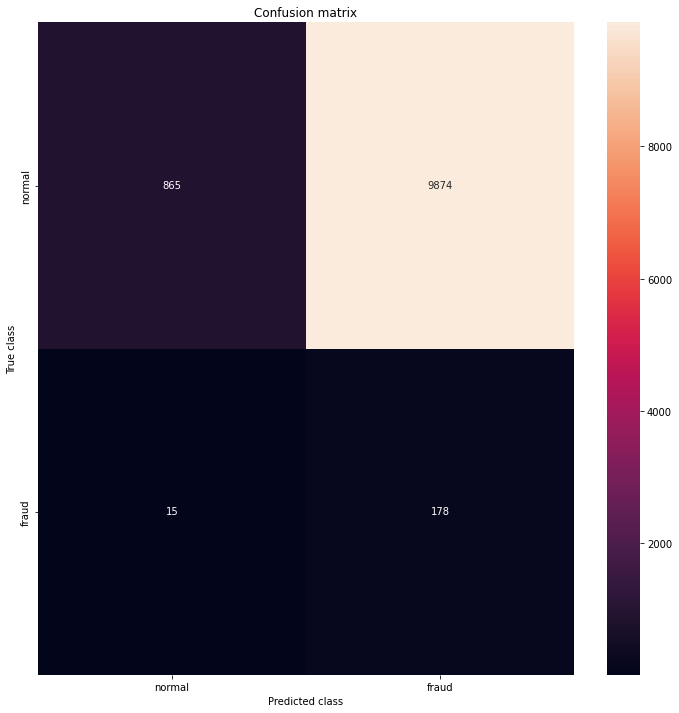

              precision    recall  f1-score   support

           0       0.98      0.08      0.15     10739
           1       0.02      0.92      0.03       193

    accuracy                           0.10     10932
   macro avg       0.50      0.50      0.09     10932
weighted avg       0.97      0.10      0.15     10932



In [ ]:
import numpy as np
pred_y = model.predict(val_ds)
pred_y=(np.rint(pred_y)).astype(int)
mostrar_resultados(val_r, pred_y)

Ahora utilizamos un modelo que rebaja la cantidad de datos beningnos y como no obtenemos el dato esperado (acurrancy del 50%), agregamos una capa neuronal mas y mas steps y el resultado sigue siendo el mismo.

In [ ]:
#Baja en la clase mayoritaria con una capa mas
from tensorflow.keras.applications import ResNet50V2 #importo el modelo de aplicacion
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
IMAGE_SIZE= (224,224,3)
encoder= ResNet50V2(    #identifica colores y formas
    include_top=False,   #la ultima capa no la quiero
    input_shape=IMAGE_SIZE,  #shape
    weights='imagenet' #dataset que se usa para entrenar
)
encoder.trainable=False                 #no aplica gradientes al encoder anterior
inputs=keras.Input(shape=IMAGE_SIZE)
x= NearMiss(n_neighbors=3, version=2) #quita datos benignos
x=keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs) #divide imputs en 255
x=encoder(x, training=False)            #Utiliza ResNet50v2
x=keras.layers.GlobalAveragePooling2D()(x) #nos deja con la cantidad correcta de canales
Capa1 = keras.layers.Dense(1, activation="sigmoid")(x)               #nos conecta todo a una sola neurona, Sigmoid= ajusta 0 o 1
outputs = keras.layers.Dense(units = 1, activation = "sigmoid")(Capa1)
model=keras.Model(inputs, outputs)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_4 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 1)                 2049      
                                                                 
 dense_6 (Dense)             (None, 1)                 2         
                                                           

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
us= NearMiss(n_neighbors=3, version=2) #quita datos benignos

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.AUC(name="auc")],
)

In [ ]:
Historia=model.fit(train_ds, epochs=20, validation_data=val_ds, validation_steps=20)

Epoch 1/20
35/35 [==============================] - 511s 15s/step - loss: 0.1640 - auc: 0.5646 - val_loss: 0.1762 - val_auc: 0.4996
Epoch 2/20
35/35 [==============================] - 515s 15s/step - loss: 0.1588 - auc: 0.4778 - val_loss: 0.1651 - val_auc: 0.4996
Epoch 3/20
35/35 [==============================] - 506s 15s/step - loss: 0.1540 - auc: 0.5040 - val_loss: 0.1525 - val_auc: 0.4996
Epoch 4/20
35/35 [==============================] - 504s 14s/step - loss: 0.1496 - auc: 0.4977 - val_loss: 0.1635 - val_auc: 0.4992
Epoch 5/20
35/35 [==============================] - 510s 15s/step - loss: 0.1455 - auc: 0.5430 - val_loss: 0.1427 - val_auc: 0.4976
Epoch 6/20
35/35 [==============================] - 508s 15s/step - loss: 0.1417 - auc: 0.4998 - val_loss: 0.1530 - val_auc: 0.4832
Epoch 7/20
35/35 [==============================] - 503s 14s/step - loss: 0.1382 - auc: 0.4936 - val_loss: 0.1446 - val_auc: 0.5000
Epoch 8/20
35/35 [==============================] - 508s 15s/step - loss: 0.

171/171 [==============================] - 1266s 7s/step


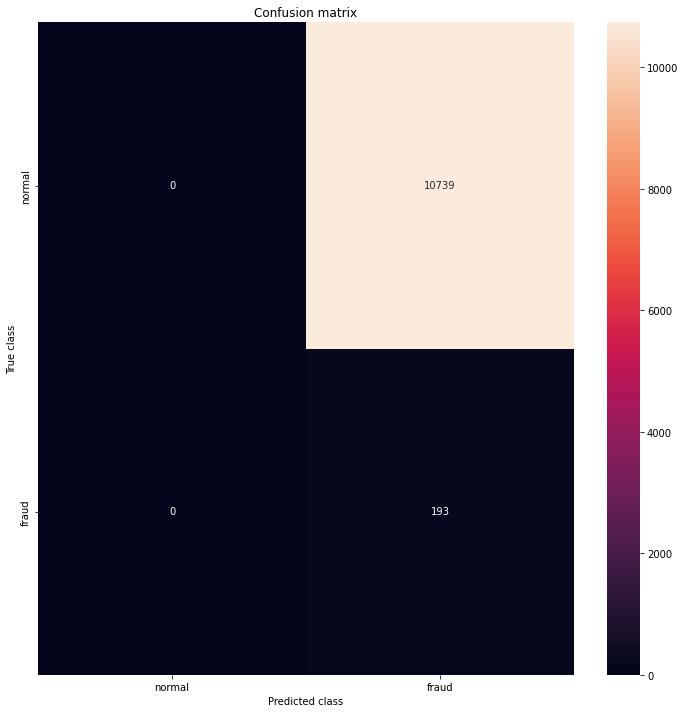

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10739
           1       0.02      1.00      0.03       193

    accuracy                           0.02     10932
   macro avg       0.01      0.50      0.02     10932
weighted avg       0.00      0.02      0.00     10932



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
pred_y = model.predict(val_ds)
pred_y=(np.rint(pred_y)).astype(int)
mostrar_resultados(val_r, pred_y)

In [ ]:
from tensorflow.keras.applications import ResNet50V2 #importo el modelo de aplicacion
from tensorflow.keras import layers
IMAGE_SIZE= (224,224,3)
encoder= ResNet50V2(    #identifica colores y formas
    include_top=False,   #la ultima capa no la quiero
    input_shape=IMAGE_SIZE,  #shape
    weights='imagenet' #dataset que se usa para entrenar
)
encoder.trainable=False                 #no aplica gradientes al encoder anterior
inputs=keras.Input(shape=IMAGE_SIZE)
x=keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs) #divide imputs en 255
x=encoder(x, training=False)                                        #Utiliza ResNet50v2
x=keras.layers.GlobalAveragePooling2D()(x)                          #nos deja con la cantidad correcta de canales
Capa1 = keras.layers.Dense(1, activation='sigmoid')(x)              
outputs = keras.layers.Dense(units = 1, activation='sigmoid')(Capa1)           #nos conecta todo a una sola neurona, Sigmoid= ajusta 0 o 1

model=keras.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 1)                 2049      
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                           

Vemos que tenemos 2048 parametros que comparan

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss="binary_crossentropy",
    metrics=['accuracy']
)

In [ ]:
Historia=model.fit(train_ds, epochs=10, validation_data=val_ds, validation_steps=10)

Epoch 1/10
35/35 [==============================] - 1248s 26s/step - loss: 0.0000e+00 - accuracy: 0.5302 - val_loss: 0.0000e+00 - val_accuracy: 0.9625
Epoch 2/10
35/35 [==============================] - 522s 15s/step - loss: 0.0000e+00 - accuracy: 0.9806 - val_loss: 0.0000e+00 - val_accuracy: 0.9656
Epoch 3/10
35/35 [==============================] - 527s 15s/step - loss: 0.0000e+00 - accuracy: 0.9824 - val_loss: 0.0000e+00 - val_accuracy: 0.9766
Epoch 4/10
35/35 [==============================] - 539s 15s/step - loss: 0.0000e+00 - accuracy: 0.9824 - val_loss: 0.0000e+00 - val_accuracy: 0.9734
Epoch 5/10
35/35 [==============================] - 529s 15s/step - loss: 0.0000e+00 - accuracy: 0.9824 - val_loss: 0.0000e+00 - val_accuracy: 0.9766
Epoch 6/10
35/35 [==============================] - 547s 16s/step - loss: 0.0000e+00 - accuracy: 0.9824 - val_loss: 0.0000e+00 - val_accuracy: 0.9734
Epoch 7/10
35/35 [==============================] - 559s 16s/step - loss: 0.0000e+00 - accuracy: 0.

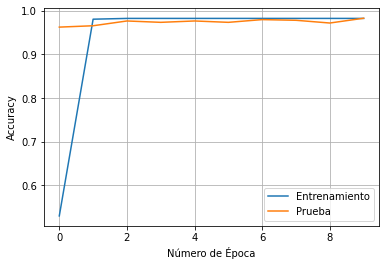

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Historia.history['accuracy'], label = 'Entrenamiento')
plt.plot(Historia.history['val_accuracy'], label = 'Prueba')
plt.grid()
plt.xlabel('Número de Época')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
def mostrar_resultados(val_r, pred_y):
    LABELS= ("normal", "fraud")
    conf_matrix = confusion_matrix(val_r, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(val_r, pred_y))

In [ ]:
val_r=val['target']
val_r.dtype
print(val_r)

0        0
1        0
2        0
3        0
4        0
        ..
10927    0
10928    0
10929    0
10930    0
10931    0
Name: target, Length: 10932, dtype: int64


In [ ]:
pred_y = model.predict(val_ds)
pred_y.dtype
print(pred_y)

171/171 [==============================] - 1297s 8s/step
[[0.36410585]
 [0.31856316]
 [0.35932043]
 ...
 [0.29844075]
 [0.30893895]
 [0.3210819 ]]


In [ ]:
import numpy as np
pred_y=(np.rint(pred_y)).astype(int)
print(pred_y)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


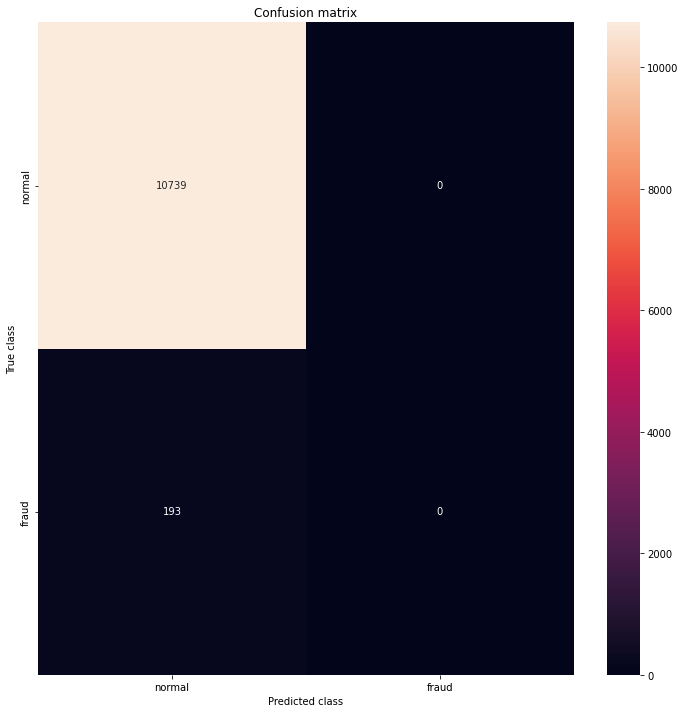

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10739
           1       0.00      0.00      0.00       193

    accuracy                           0.98     10932
   macro avg       0.49      0.50      0.50     10932
weighted avg       0.97      0.98      0.97     10932



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
mostrar_resultados(val_r, pred_y)